# 图像K均值聚类

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.ndimage.filters import convolve
from skimage.util import view_as_windows as viewW

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [24]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def kmean_cluster(src,k):
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros(src.shape,dtype=np.float64)
    rgb = np.float64(src)
    # 灰度图像信息储存
    imageData = np.reshape(np.float64(rgb2gray(src)).copy(),(rows*cols,))
    # 定义聚类均值存储变量(存储每一个聚类的均值)  
    meanCluster = np.zeros((k,),dtype=np.float64)
    # 定义聚类标记变量(标记当前像素属于哪一类)  
    markCluster = np.zeros((rows * cols,),dtype=np.int32)
    # 定义聚类像素和存储变量(存储每一类像素值之和)  
    sumCluster = np.zeros((k,),dtype=np.float64)
    # 定义聚类像素统计变量(存储每一类像素的数目) 
    countCluster = np.zeros((k,),dtype=np.int32)
    # 定义聚类RGB分量存储变量(存储每一类的RGB三分量大小)
    sumR = np.zeros_like(sumCluster)
    sumG = np.zeros_like(sumCluster)
    sumB = np.zeros_like(sumCluster)
    mJduge = np.zeros_like(sumCluster)
    
    temp_v = 0.0
    count = 0
    
    s = True
    while s:
        sum_val = 0.0
#         s = False
        # 初始化聚类均值
        for i in range(k):
            meanCluster[i] = i * 255.0 / (k - 1)
        markCluster = np.reshape(markCluster,(rows * cols,))
        # 计算类归属
        for i in range(rows * cols - 1):
            temp_v = np.abs(imageData[i] - meanCluster[0])
            count = 0
            for j in range(k):
                t = np.abs(imageData[i] - meanCluster[j])
                if temp_v > t:
                    temp_v = t
                    count = j
            countCluster[count] += 1
            sumCluster[count] += imageData[i]
            markCluster[i] = count
        #更新聚类均值    
        for i in range(k):
            meanCluster[i] = sumCluster[i] / countCluster[i]
            sum_val += meanCluster[i] - mJduge[i]
            mJduge[i] = meanCluster[i]
            
        if sum_val == 0:
            s = False
            
        # 计算聚类RGB分量
        markCluster = np.reshape(markCluster,(rows,cols))  
        for i in range(rows):
            for j in range(cols):
                idx = markCluster[i,j]
                sumR[markCluster[i,j]] += rgb[i,j,0]
                sumG[markCluster[i,j]] += rgb[i,j,1]
                sumB[markCluster[i,j]] += rgb[i,j,2]
             
        for i in range(rows):
            for j in range(cols):
                dst[i,j,0] = sumR[markCluster[i,j]] / countCluster[markCluster[i,j]]
                dst[i,j,1] = sumG[markCluster[i,j]] / countCluster[markCluster[i,j]]
                dst[i,j,2] = sumB[markCluster[i,j]] / countCluster[markCluster[i,j]]
    return cv2.convertScaleAbs(dst)

In [25]:
dst = kmean_cluster(src,6)

Text(0.5,1,'KMean Cluster:6')

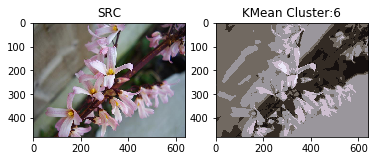

In [26]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('KMean Cluster:6')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45110569